# 7. Приближённое решение смешанной краевой задачи для волнового уравнения

Найти приближённое решение смешанной краевой задачи для неоднородного волнового уравнения при $0 \leq x \leq 1$. Для расчёта решения использовать схему «крест» с шагом $h = 0.05$ по переменной $x$. Предусмотреть возможность произвольного задания шага по переменной $t$ и времени окончания расчёта (по умолчанию $\tau = 0.05$ и $T = 1$, соответственно). Для получения решения использовать начальные и граничные условия первого и второго порядка точности. Для сравнения приведено точное решение $u_0(x, t)$.

$$
2u_{tt} = u_{xx} - \frac{16(x + t)}{\left(1 + 4(x + t)^2\right)^2},
$$
$$
u(x, 0) = \arctg(2x), \quad u_{t}(x, 0) = \frac{2}{1 + 4x^2},
$$
$$
u(0, t) - u_{x}(0, t) = \arctg(2t) - \frac{2}{1 + 4t^2},
$$
$$
u_{x}(1, t) = \frac{2}{1 + 4(1 + t)^2},
$$
$$
u_0(x, t) = \arctg 2(x + t).
$$

In [693]:
import numpy as np
import matplotlib.pyplot as plt

In [694]:
xs, xe = 0, 1
ts, te = 0, 1
h = 0.05
tau = 0.05

x = np.arange(xs, xe + h, h)
t = np.arange(ts, te + tau, tau)
X, T = np.meshgrid(x, t)
u = np.zeros((len(x), len(t)))

u0 = np.arctan(2 * (X + T))

In [695]:
c = np.sqrt(1/2)
r = c * tau / h

f0 = -16*x / (1 + 4*x**2)**2

us = np.arctan(2 * x)
us_t = 2 / (1 + 4*x**2)

b1 = np.arctan(2 * t) - 2/(1 + 4*t**2)
b2 = 2 / (1 + 4*(1 + t)**2)

In [696]:
def is_stable():
    return r <= 1

is_stable()

np.True_

In [697]:
u[:, 0] = us

us_xx = -16*x / (1 + 4*x**2)**2

u[:, 1] = (us + 
           tau * us_t + 
           (tau**2 / 2) * (c**2 * us_xx + c**2 * f0))

In [698]:
f = -16*(X + T) / (1 + 4*(X + T)**2)**2

for n in range(1, len(t) - 1):
    for j in range(1, len(x) - 1):
        u[j, n+1] = (2*u[j, n] - u[j, n-1] + 
                     r**2*(u[j+1, n] - 2*u[j, n] + u[j-1, n]) + 
                     tau**2 * c**2 * f[n, j])

    u[0, n+1] = (2*h * b1[n+1] + 4*u[1, n+1] - u[2, n+1]) / (2*h + 3)
    u[-1, n+1] = (2*h * b2[n+1] + 4*u[-2, n+1] - u[-3, n+1]) / 3


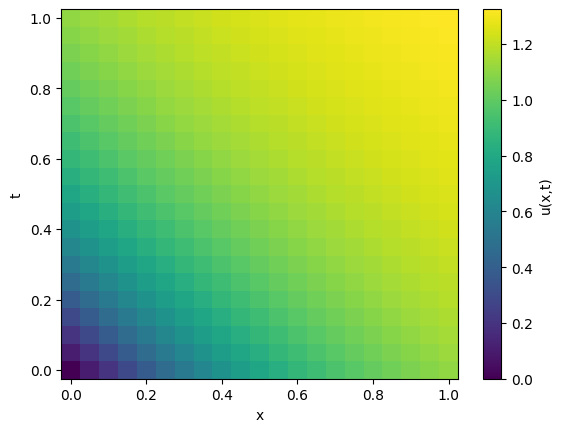

In [699]:
X, T = np.meshgrid(x, t)
plt.figure()
plt.pcolormesh(X, T, u.T, cmap='viridis', shading='auto')
plt.colorbar(label='u(x,t)')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

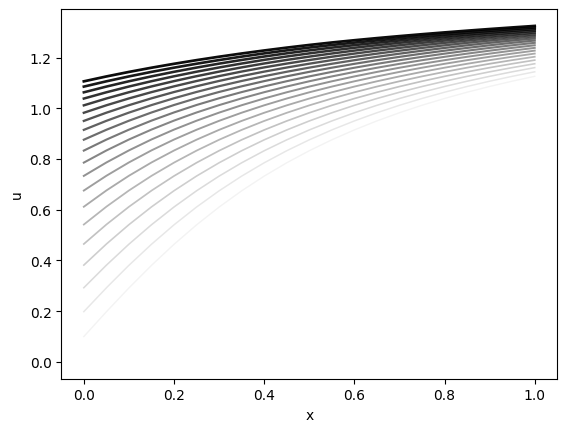

In [700]:
for i in range(0, len(t)):
    plt.plot(x, u[:, i], alpha=i/len(t), linewidth=1+i/len(t), c='black')

plt.xlabel('x')
plt.ylabel('u')
plt.show()

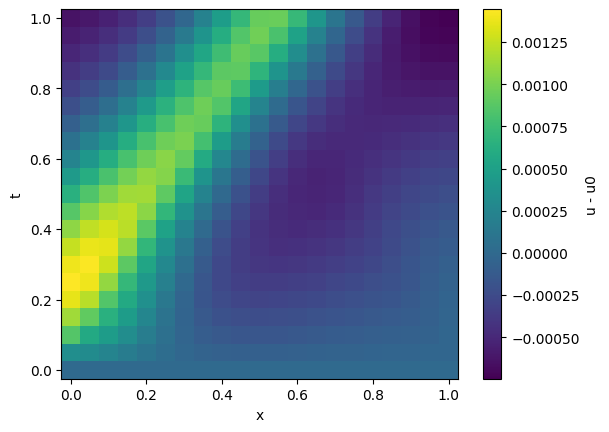

In [701]:
X, T = np.meshgrid(x, t)
plt.figure()
plt.pcolormesh(X, T, u.T - u0, cmap='viridis', shading='auto')
plt.colorbar(label='u - u0')
plt.xlabel('x')
plt.ylabel('t')
plt.show()